In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from branchcut.exampleCreator import createExample, createUnwrappedBaseline, TrueBranchCuts
from branchcut.unwrap import *
from branchcut.setup import find_residues, create_mask
from branchcut.branchCut import branch_cut

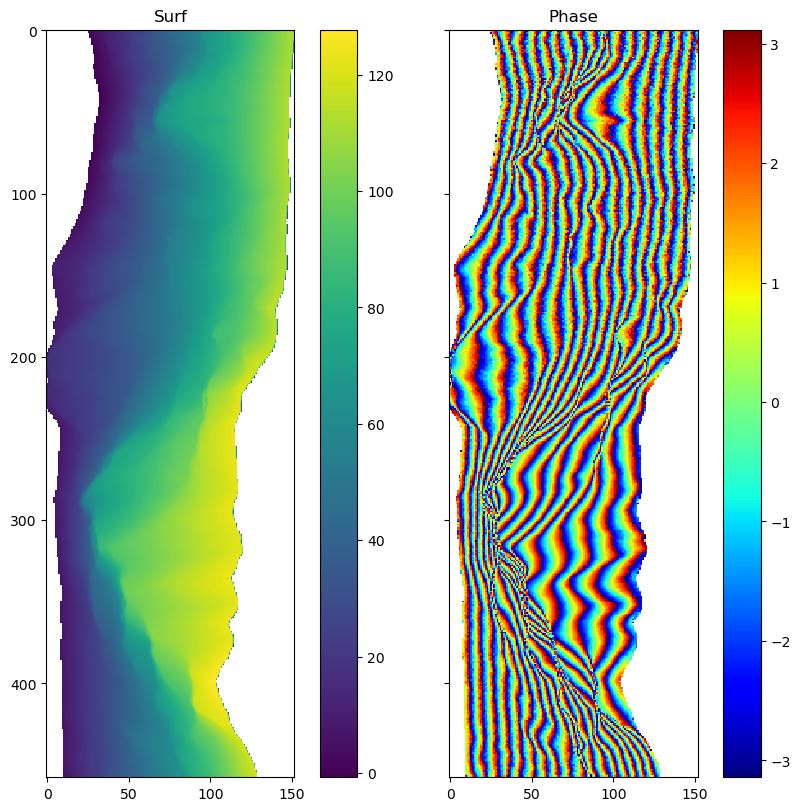

In [2]:
DIR = '../data/simulated_data_book'
EXAMPLE = 'longs.152x458'
SHAPE = (458,152) #long
#EXAMPLE = 'isola.157x458'
#SHAPE = (458,157) #isola

vars = ['mask','phase','surf']
dtypes = ['uint8','int8','>f4']
data = {}
for i,v in enumerate(vars):
    filename =EXAMPLE+'.'+v
    data[v]=np.fromfile(os.path.join(DIR,filename),dtype=dtypes[i]).reshape(SHAPE)

data['mask'] = data['mask'].astype(bool)
data['phase'] = np.pi * (data['phase'] + 128) / 128 - np.pi # wrapped phase in radians
data['phase'][~data['mask']] = np.nan
data['surf'][~data['mask']] = np.nan

fig, ax = plt.subplots(1,2, sharey=True, layout='constrained', figsize=(8,8))


im = ax[0].imshow(data['surf'])
ax[0].set_title('Surf')
fig.colorbar(im)

im = ax[1].imshow(data['phase'],cmap='jet',interpolation='nearest')
ax[1].set_title('Phase')
fig.colorbar(im)

In [3]:
#seed = (25,100) # long
seed = (40,40) # isola

residues = find_residues(data['phase'])
BranchCuts = branch_cut(residues)
BranchCuts[~data['mask']] = True
#BranchCuts[250+36,52]=True
phase_unwrapped_BC = unwrap(data['phase'],seed=seed, branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)
phase_unwrapped_BC_2 = unwrap(data['phase'],seed=seed, branchCuts=BranchCuts, mode='dfs',unwrapBranchPixels=True)

c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\setup\setup.py:104: RuntimeWarning: invalid value encountered in cast
  return _np.round(out).astype(int)
c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\branchCut\branchCut.py:153: RuntimeWarning: overflow encountered in scalar add
  charge += residue[p]


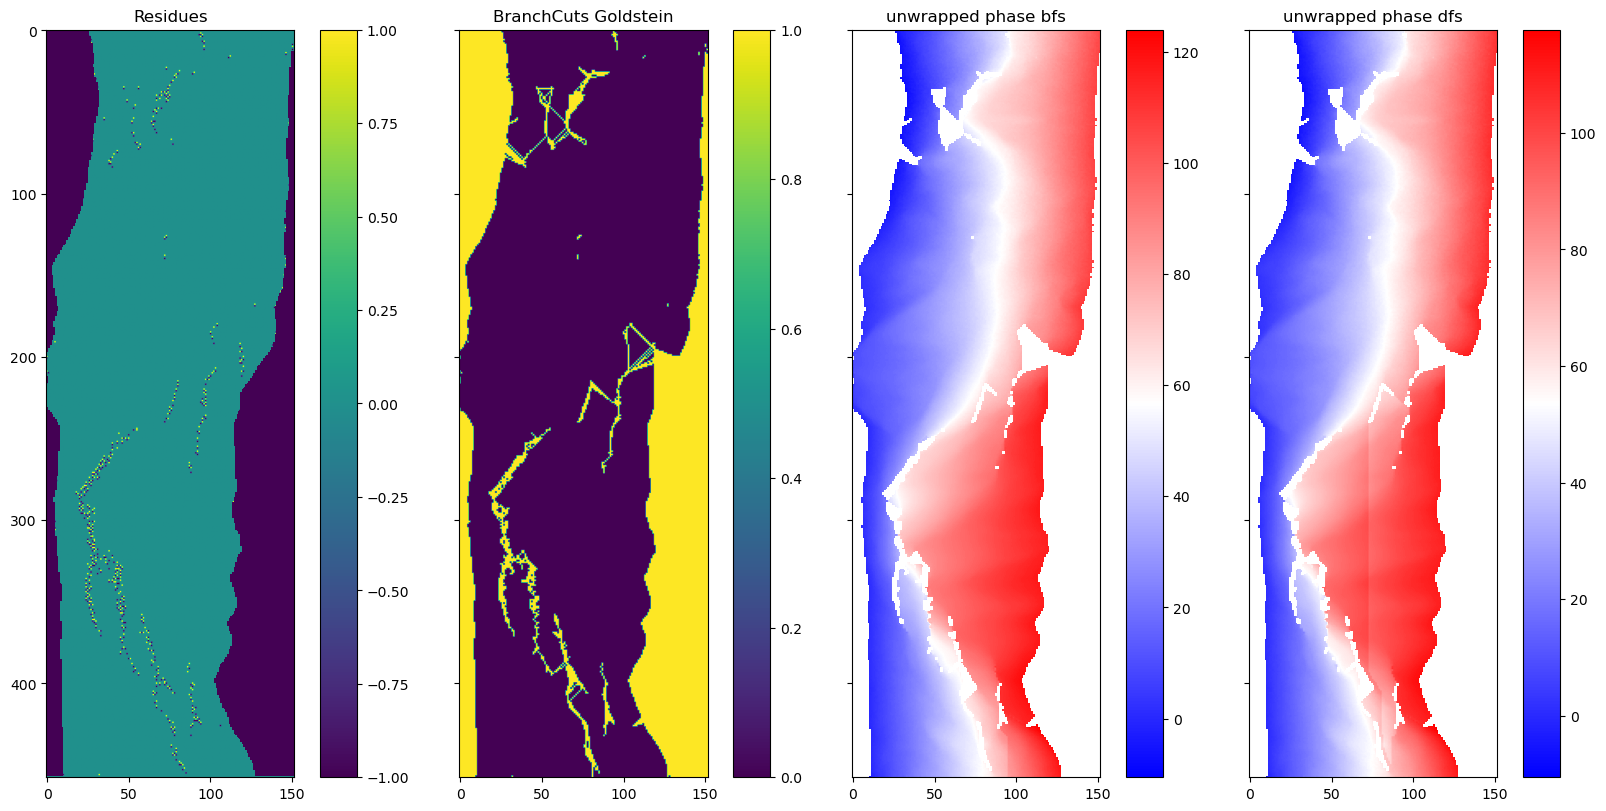

In [4]:
fig, ax = plt.subplots(1,4, sharey=True, layout='constrained', figsize=(16,8))

im = ax[0].imshow(residues, vmin=-1, vmax=1)
ax[0].set_title('Residues')
fig.colorbar(im)

im = ax[1].imshow(BranchCuts)
ax[1].set_title('BranchCuts Goldstein')
fig.colorbar(im)

im = ax[2].imshow(phase_unwrapped_BC, cmap='bwr')
#im = ax[2].imshow(phase_unwrapped_BC ,vmin=-6*np.pi,vmax=-4*np.pi, cmap='bwr')
ax[2].set_title('unwrapped phase bfs')
fig.colorbar(im)

im = ax[3].imshow(phase_unwrapped_BC_2, cmap='bwr')
#im = ax[3].imshow(phase_unwrapped_BC_2 ,vmin=-6*np.pi,vmax=-4*np.pi, cmap='bwr')
ax[3].set_title('unwrapped phase dfs')
fig.colorbar(im)

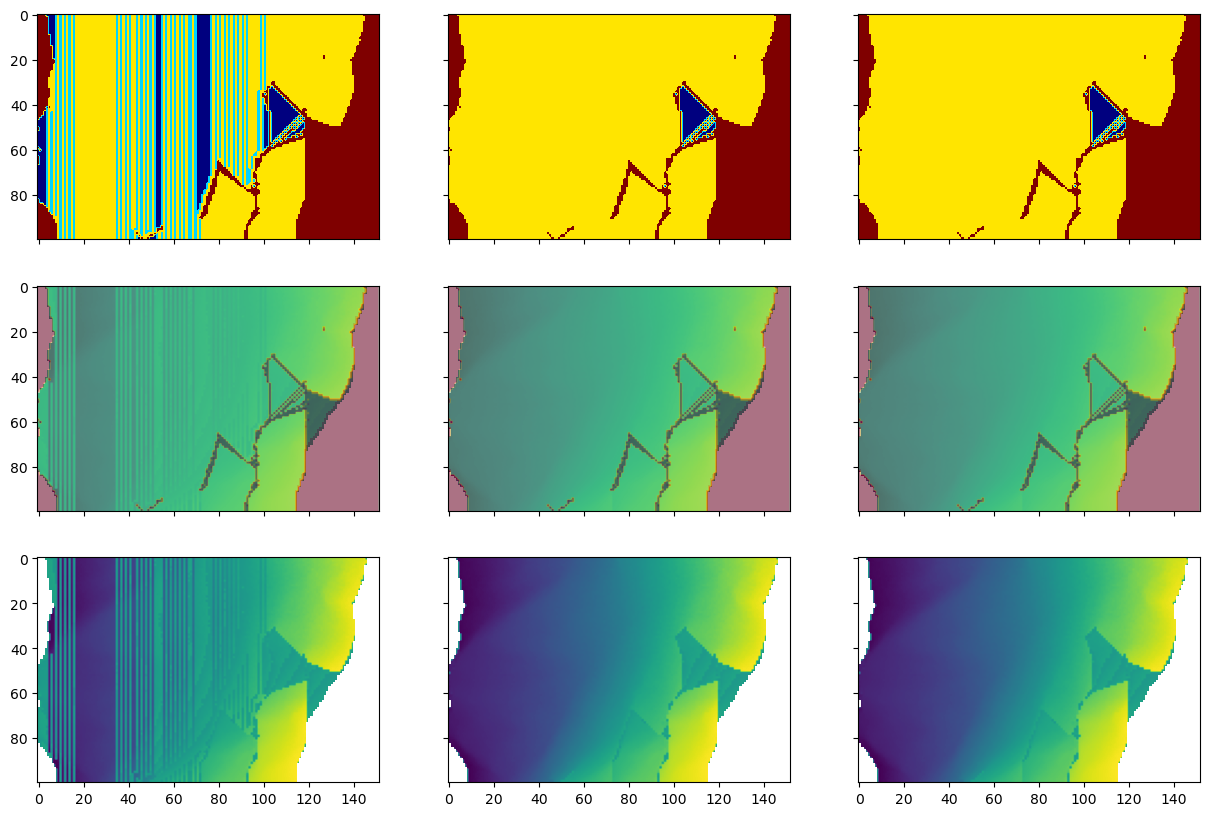

In [5]:
fig, ax = plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
seed = (100,100)

cmap = plt.get_cmap('jet', 4)

displayer = unWrapDisplayer(data['phase'], seed=seed, branchCuts=BranchCuts, mode='dfs')
for a in range(3):
    for i in range(40000):
        displayer.update()
    
    image = displayer.adjoin.astype(int) + displayer.unwrapped.astype(int)
    image[BranchCuts] = 3

    im = ax[0,a].imshow(image[150:250,:], vmin=-0.5,vmax=3.5,cmap=cmap)
    ax[1,a].imshow(displayer.f_phase[150:250,:])
    ax[1,a].imshow(residues[150:250,:],alpha=0.33,vmin=-1,vmax=1)
    ax[1,a].imshow(BranchCuts[150:250,:],alpha=0.33,vmin=-1,vmax=1,cmap='jet')
    #ax[1,a].imshow(image[250:300,:75]==3,alpha=0.33)

    #ax[2,a].imshow(residues[350:,:],alpha=0.9,vmin=-1,vmax=1)

    ax[2,a].imshow(displayer.f_phase[150:250:,:])